# Latar Belakang Project
mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik yang tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung agar informasi dipahami masyarakat dengan lebih mudah

buatlah sebuah vektor karakter dengan 3 elemen dengan nama bersatulawancovid, berisi kunci dasar menghindari COVID-19

In [1]:
bersatulawancovid = ['cuci tangan', 'pakai masker', 'jaga jarak']
print(bersatulawancovid)

['cuci tangan', 'pakai masker', 'jaga jarak']


# Bermain API

## Mengakses API covid19.go.id
menggunakan fungsi get() dari library requests

In [2]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

## Mengevaluasi Respon
saat menjalankan fungsi get(), yang terjadi adalah membuat sebuah permintaan kepada server penyedia API hingga diproses dan dijawab oleh server sebagai sebuah respon

informasi utama dalam sebuah respon API, yaitu 
- status, informasi gagal berhasilnya permintaan yang dinyatakan dalam status code
- headers, mengandung informasi metadata
- body, berisikan konten atas permintaan yang telah dibuat

## Status Code
- 200, Artinya permintaan sukses dipenuhi.
- 404, Artinya berkas yang diminta tidak dapat ditemukan.
- 500, Artinya akses permintaan ditolak.
- 501, Artinya terjadi kesalahan pada server.

In [3]:
# mencetak resp secara langsung untuk memberikan output status atas permintaan melalui API
print(resp)

<Response [200]>


## Headers API
mengetahui metadata apa saja yang tersimpan untuk mengetahui content-type dan terakhir kali informasi diperbaharui

In [4]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Tue, 23 Mar 2021 13:11:16 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Tue, 23 Mar 2021 13:06:27 GMT', 'ETag': 'W/"6059e7d3-245ba"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


## Mengekstrak Isi Respon
mengekstrak konten tersebut dengan menggunakan method json() yang merupakan builtin JSON decoder untuk mengekstrak content bertipe JSON

juga dapat menggunakan attribut content tetapi ini berupa binary content yang perlu diproses kembali nantinya

In [5]:
cov_id_raw = resp.json()

menggunakan fungsi len() dan method keys()

In [6]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


## Analisa Data
menjawab pertanyaan-pertanyaan berikut:
- Kapan tanggal pembaharuan data penambahan kasus?
- Berapa jumlah penambahan kasus sembuh?
- Berapa jumlah penambahan kasus meninggal?
- Berapa jumlah total kasus positif hingga saat ini?
- Berapa jumlah total kasus meninggal hingga saat ini?

In [7]:
print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh   :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal   :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini   :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini   :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2021-03-23
Jumlah penambahan kasus sembuh   : 6954
Jumlah penambahan kasus meninggal   : 154
Jumlah total kasus positif hingga saat ini   : 1471225
Jumlah total kasus meninggal hingga saat ini   : 39865


# COVID-19 Di Sekitar


## Kasus COVID-19 di jabar
berfokus dengan data COVID-19 di provinsi Jawa Barat

In [8]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

## Memahami Kasus COVID-19 di Jawa Barat
menggunakan method keys() pada cov_jabar_raw tersebut untuk mengetahui nama-nama elemen utama 

In [10]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


jawablah pertanyaan berikut:
- Berapa jumlah total kasus COVID-19 di Jawa Barat?
- Berapa persentase kematian akibat COVID-19 di Jawa Barat?
- Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?

In [12]:
print('Jumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 238613
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.197755.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 85.863721.2%


## Memperoleh Informasi yang Lebih Lengkap
ekstrak data tersebut dari cov_jabar_raw dan mengubah data bertipe dict ke pandas dataframe

In [14]:
import numpy as np
import pandas as pd

# simpan hasilnya sebagai obyek bernama cov_jabar
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
# lihat 5 data teratas
cov_jabar.head()

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1583107200000,3,0,0,3,3,0,0,3
1,1583193600000,1,1,0,0,4,0,1,3
2,1583280000000,1,0,0,1,5,0,1,4
3,1583366400000,1,0,0,1,6,0,1,5
4,1583452800000,1,0,0,1,7,0,1,6


cov_jabar menggunakan method info()

In [15]:
cov_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       383 non-null    int64
 1   KASUS                         383 non-null    int64
 2   MENINGGAL                     383 non-null    int64
 3   SEMBUH                        383 non-null    int64
 4   DIRAWAT_OR_ISOLASI            383 non-null    int64
 5   AKUMULASI_KASUS               383 non-null    int64
 6   AKUMULASI_SEMBUH              383 non-null    int64
 7   AKUMULASI_MENINGGAL           383 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  383 non-null    int64
dtypes: int64(9)
memory usage: 27.1 KB


## Menjinakkan Data 
menjinakan data cov_jabar dengan beberapa tahapan
- Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
- Merubah format penulisan semua kolom menjadi huruf kecil
- Mengganti nama kolom kasus menjadi kasus_baru
- Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

In [17]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
																if item.startswith('AKUMULASI')
																or item.startswith('DIRAWAT')])
												.rename(columns=str.lower)
												.rename(columns={'kasus': 'kasus_baru'})
				  )
# Simpan hasil pengolahan
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
# Lima data teratas
cov_jabar_tidy.head()

,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-02,3,0,0
1,2020-03-03,1,1,0
2,2020-03-04,1,0,0
3,2020-03-05,1,0,0
4,2020-03-06,1,0,0


## Menunjukkan Melalui Gambar
mengekspresikan data tersebut dalam bentuk grafik agar lebih mudah dicerna 

```
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
```
komponen utama untuk membuat visualisasi antara lain adalah tabel data, kolom data, serta bentuk geometri untuk menampilkan data
- membuat scatter-plot yang diperlukan adalah bentuk geometri titik (.scatter())
- line-chart memerlukan geometri garis (.plot())
- bar-chart memerlukan bentuk geometri batang atau kolom (.bar())

<Figure size 432x288 with 0 Axes>

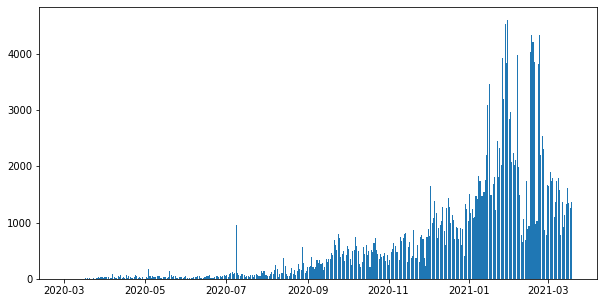

In [18]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

## Informasi pada Grafik
membuat bar-chart namun informasinya belum jelas

<Figure size 432x288 with 0 Axes>

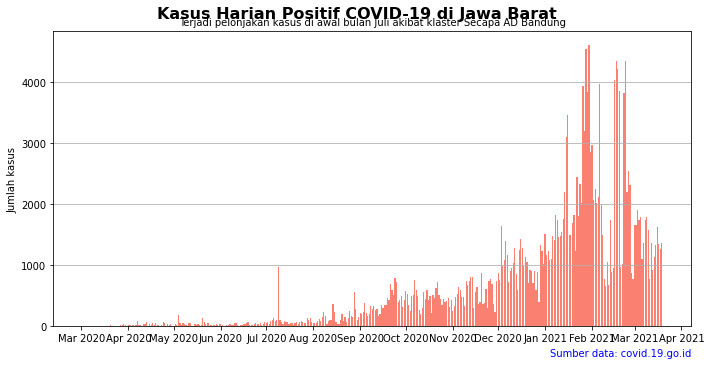

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Grafik untuk Kasus Sembuh
menggunakan data kasus sembuh dengan warna olivedrab

<Figure size 432x288 with 0 Axes>

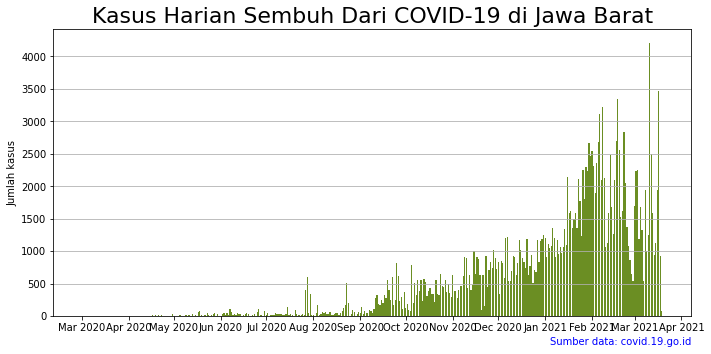

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Grafik untuk Kasus Meninggal
menggunakan data kasus meninggal dengan warna slategrey

<Figure size 432x288 with 0 Axes>

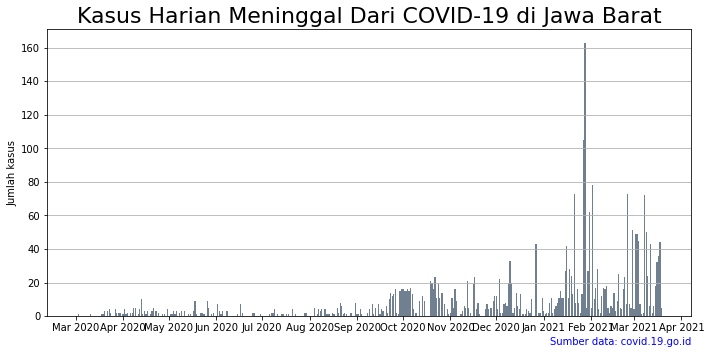

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Menggali Lebih Dalam

## Apakah Pekan ini Lebih Baik?
mengamati perkembangan kasus dalam rentang waktu pekanan
- set terlebih dahulu kolom tanggal pada cov_jabar_tidy sebagai index
- terapkan method pada time series di pandas, `resampling` per pekan dan gunakan agregasi penjumlahan
- mengekstrak informasi pekan dalam satu tahun adalah `weekofyear` dan `year` untuk tahun

In [24]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]
# Lima data teratas cov_jabar_pekanan 
cov_jabar_pekanan.head()

,tahun,pekan_ke,jumlah
0,2020,10,7
1,2020,11,5
2,2020,12,52
3,2020,13,104
4,2020,14,122


info data jabar pekanan

In [23]:
print('Info cov_jabar_pekanan:')
cov_jabar_pekanan.info()

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     55 non-null     int64
 1   pekan_ke  55 non-null     int64
 2   jumlah    55 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB


## Menjawab Pertanyaan
- Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama `jumlah_pekanlalu`.
- Mengganti nilai NaN pada kolom `jumlah_pekanlalu` dengan nilai 0
- Melakukan komparasi antara kolom `jumlah` dengan kolom `jumlah_pekanlalu`. Hasil komparasi ini disimpan dalam kolom baru dengan nama `lebih_baik`, isinya adalah True apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu

In [25]:
# method shift() untuk membuat kolom jumlah_pekanlalu
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

# menampilkan sepuluh data teratas
cov_jabar_pekanan.head(10)

,tahun,pekan_ke,jumlah,jumlah_pekanlalu,lebih_baik
0,2020,10,7,0,False
1,2020,11,5,7,True
2,2020,12,52,5,False
3,2020,13,104,52,False
4,2020,14,122,104,False
5,2020,15,235,122,False
6,2020,16,277,235,False
7,2020,17,216,277,True
8,2020,18,156,216,True
9,2020,19,367,156,False


## Membuat Bar Chart
membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

<Figure size 432x288 with 0 Axes>

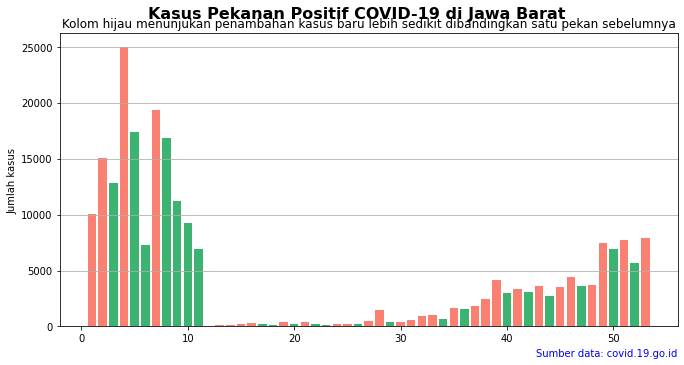

In [26]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_jabar_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)
			  
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Pola dan Dinamika
berapa kasus yang masih aktif menandakan sedang dalam perawatan atau isolasi

menghitung jumlah kasus aktif dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal

In [27]:
# menggunakan method cumsum() untuk menghitung nilai akumulasi dari suatu vektor numerik
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
cov_jabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
378,2021-03-15,32864,197421,2733
379,2021-03-16,32515,199355,2765
380,2021-03-17,30354,202827,2801
381,2021-03-18,30653,203745,2845
382,2021-03-19,31925,203829,2850


## Membuat Line Chart

<Figure size 432x288 with 0 Axes>

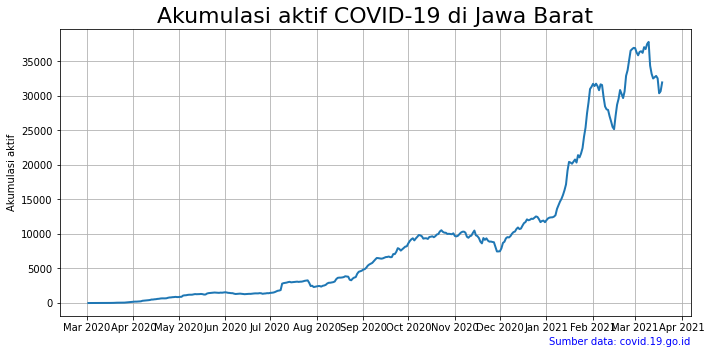

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
# buat line-chart pola kasus aktif dengan menggunakan method plot pada ax
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

## Kabar Buruk dan Kabar Baik
membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal

pilihan cara yang dapat ditempuh untuk membuat grafik
- Menggunakan data frame cov_jabar_akumulasi, kemudian langsung melakukan line plot dan memilih warna garis yang sesuai untuk membedakan; atau
- Menggunakan ax.plot() dan mengisikan kolom-kolom yang masing-masingnya menjadi x dan y dengan data=cov_jabar_akumulasi, dan kemudian menset warna berbeda untuk ketiga line plot.

<Figure size 432x288 with 0 Axes>

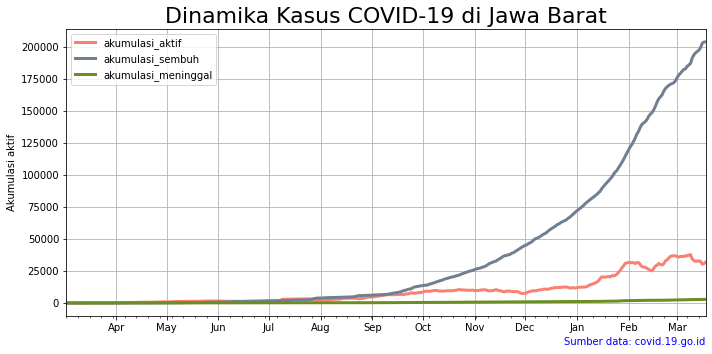

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, 
						 color=['salmon', 'slategrey', 'olivedrab'])

# membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal
ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat', 
			 fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
	    ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()